<a href="https://colab.research.google.com/github/Marteldelfer/PISI3/blob/main/Analise_exploratoria_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
    tmdb_clean = pd.read_csv('tmdb_clean.csv')
    print(tmdb_clean.describe())

except FileNotFoundError:
    print("Error: 'tmdb_clean.csv' not found. Please make sure the file exists and the path is correct.")

except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")


                 id  vote_average    vote_count       revenue       runtime  \
count  1.203200e+04  12032.000000  12032.000000  1.203200e+04  12032.000000   
mean   2.130602e+05      6.182667   1487.826878  6.044362e+07    106.897606   
std    3.073344e+05      1.503858   3048.613088  1.502937e+08     29.061544   
min    5.000000e+00      0.000000      0.000000  1.000000e+00      0.000000   
25%    1.144275e+04      5.781250     60.000000  1.563881e+06     93.000000   
50%    4.412200e+04      6.400000    359.000000  1.073970e+07    104.000000   
75%    3.393985e+05      7.000000   1462.000000  4.917633e+07    120.000000   
max    1.472280e+06     10.000000  37417.000000  2.923706e+09    990.000000   

             budget    popularity   imdb_rating    imdb_votes  
count  1.203200e+04  12032.000000  12032.000000  1.203200e+04  
mean   2.202409e+07      6.089499      6.341838  7.908939e+04  
std    3.698798e+07     11.936525      1.143847  1.749742e+05  
min    1.000000e+00      0.00100

In [4]:


try:
    tmdb_clean = pd.read_csv('tmdb_clean.csv')

    tmdb_clean = tmdb_clean.drop(columns=['imdb_rating', 'imdb_votes'], errors='ignore')

    print(tmdb_clean.describe())

except FileNotFoundError:
    print("Error: 'tmdb_clean.csv' not found. Please make sure the file exists and the path is correct.")

except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Check the column names in the CSV file.")


                 id  vote_average    vote_count       revenue       runtime  \
count  1.203200e+04  12032.000000  12032.000000  1.203200e+04  12032.000000   
mean   2.130602e+05      6.182667   1487.826878  6.044362e+07    106.897606   
std    3.073344e+05      1.503858   3048.613088  1.502937e+08     29.061544   
min    5.000000e+00      0.000000      0.000000  1.000000e+00      0.000000   
25%    1.144275e+04      5.781250     60.000000  1.563881e+06     93.000000   
50%    4.412200e+04      6.400000    359.000000  1.073970e+07    104.000000   
75%    3.393985e+05      7.000000   1462.000000  4.917633e+07    120.000000   
max    1.472280e+06     10.000000  37417.000000  2.923706e+09    990.000000   

             budget    popularity  
count  1.203200e+04  12032.000000  
mean   2.202409e+07      6.089499  
std    3.698798e+07     11.936525  
min    1.000000e+00      0.001000  
25%    2.000000e+06      1.613625  
50%    8.500000e+06      3.547500  
75%    2.500000e+07      7.521625  


In [5]:
tmdb_clean['profit_percentage'] = (((tmdb_clean['revenue'] - tmdb_clean['budget']) / tmdb_clean['budget']) * 100)

tmdb_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12032 non-null  int64  
 1   title                    12032 non-null  object 
 2   vote_average             12032 non-null  float64
 3   vote_count               12032 non-null  float64
 4   release_date             12032 non-null  object 
 5   revenue                  12032 non-null  float64
 6   runtime                  12032 non-null  float64
 7   budget                   12032 non-null  float64
 8   original_language        12032 non-null  object 
 9   popularity               12032 non-null  float64
 10  genres                   12032 non-null  object 
 11  production_companies     11629 non-null  object 
 12  production_countries     11781 non-null  object 
 13  cast                     11983 non-null  object 
 14  director              

In [6]:
# prompt: Limite o campo profit_-percentage a 5000. Sobrescreva todos os valores superiores por 5000

tmdb_clean['profit_percentage'] = tmdb_clean['profit_percentage'].clip(upper=5000)


In [7]:
# prompt: retire os atributos imdb rating e imdb votes

# Assuming tmdb_clean is a CSV file.  Replace 'tmdb_clean.csv'
# with the actual path or URL if different.
try:
    tmdb_clean = pd.read_csv('tmdb_clean.csv')

    # Retire os atributos imdb_rating e imdb_votes
    tmdb_clean = tmdb_clean.drop(columns=['imdb_rating', 'imdb_votes'], errors='ignore')

    # ... rest of your code
except FileNotFoundError:
    print("Error: 'tmdb_clean.csv' not found. Please make sure the file exists and the path is correct.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Check the column names in the CSV file.")


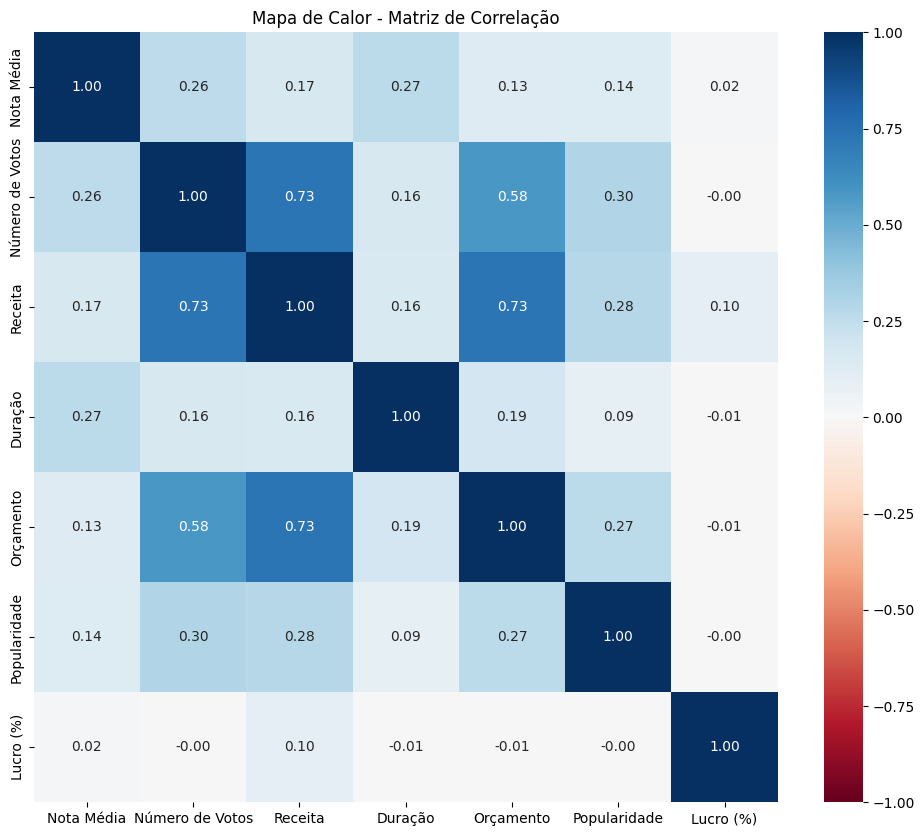

In [ ]:

# Função para traduzir nomes das variáveis
def traduzir_variaveis(variaveis):
    traducoes = {
        'vote_average': 'Nota Média',
        'vote_count': 'Número de Votos',
        'revenue': 'Receita',
        'runtime': 'Duração',
        'budget': 'Orçamento',
        'popularity': 'Popularidade',
        'profit_percentage': 'Lucro (%)'
    }

    return [traducoes.get(var, var) for var in variaveis]

# Seleciona apenas colunas numéricas
numerical_cols = tmdb_clean.select_dtypes(include=['number'])

# Remove a coluna 'id' se ela existir
if 'id' in numerical_cols.columns:
    numerical_cols = numerical_cols.drop('id', axis=1)

# Calcula a matriz de correlação
correlation_matrix = numerical_cols.corr()

# Traduz os nomes das colunas e índices
translated_labels = traduzir_variaveis(correlation_matrix.columns.tolist())
correlation_matrix.columns = translated_labels
correlation_matrix.index = translated_labels

# Cria o mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", vmax=1, vmin=-1)
plt.title('Mapa de Calor - Matriz de Correlação')
plt.show()


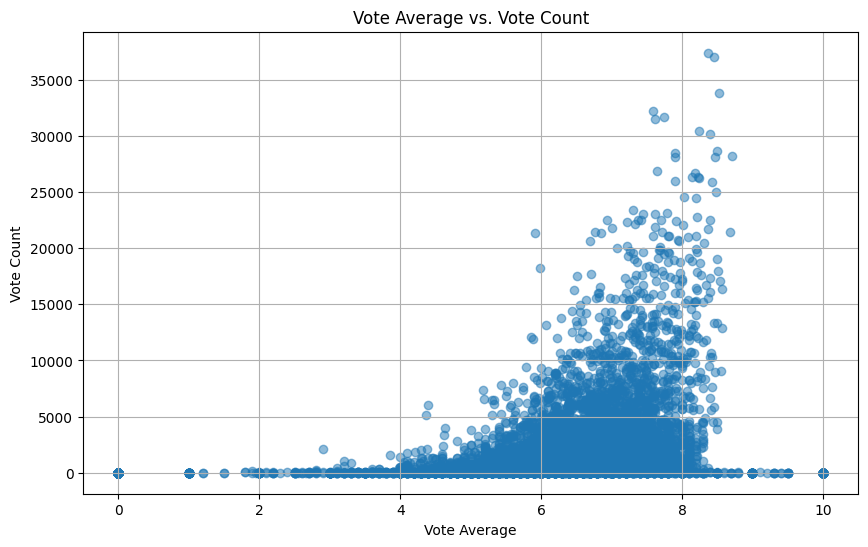

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(tmdb_clean['vote_average'], tmdb_clean['vote_count'], alpha=0.5)
plt.title('Avaliação média vs. Quantidade de votos')
plt.xlabel('Avaliação média')
plt.ylabel('Quantidade de votos')
plt.grid(True)
plt.show()


🔍 1. Concentração de Filmes em Notas Intermediárias (6 a 7.5)
A maior parte dos filmes com muitos votos (acima de 5.000, por exemplo) está entre nota 6 e 8.

Isso sugere que a média das avaliações tende a ficar nessa faixa — o que é esperado em datasets grandes, pois notas extremas são menos comuns.

⚠️ 2. Notas Muito Baixas ou Altas Têm Poucos Votos
Há filmes com nota próxima de 0 ou 10, mas com baixíssima contagem de votos (muitos abaixo de 100).

Isso indica que notas extremas podem ser enviesadas, e são provavelmente de filmes pouco conhecidos ou com pouca audiência.

⭐ 3. Filmes com Muitos Votos Tendem a Ter Boa Reputação
Filmes com 20.000 a 35.000 votos (extremos superiores no eixo Y) estão entre 7 e 8 de média.

Provavelmente são filmes populares e bem recebidos, mostrando que o público tende a avaliar positivamente obras de grande alcance.


                 id  vote_average    vote_count       revenue       runtime  \
count  1.203200e+04  12032.000000  12032.000000  1.203200e+04  12032.000000   
mean   2.130602e+05      6.182667   1487.826878  6.044362e+07    106.897606   
std    3.073344e+05      1.503858   3048.613088  1.502937e+08     29.061544   
min    5.000000e+00      0.000000      0.000000  1.000000e+00      0.000000   
25%    1.144275e+04      5.781250     60.000000  1.563881e+06     93.000000   
50%    4.412200e+04      6.400000    359.000000  1.073970e+07    104.000000   
75%    3.393985e+05      7.000000   1462.000000  4.917633e+07    120.000000   
max    1.472280e+06     10.000000  37417.000000  2.923706e+09    990.000000   

             budget    popularity   imdb_rating    imdb_votes  
count  1.203200e+04  12032.000000  12032.000000  1.203200e+04  
mean   2.202409e+07      6.089499      6.341838  7.908939e+04  
std    3.698798e+07     11.936525      1.143847  1.749742e+05  
min    1.000000e+00      0.00100

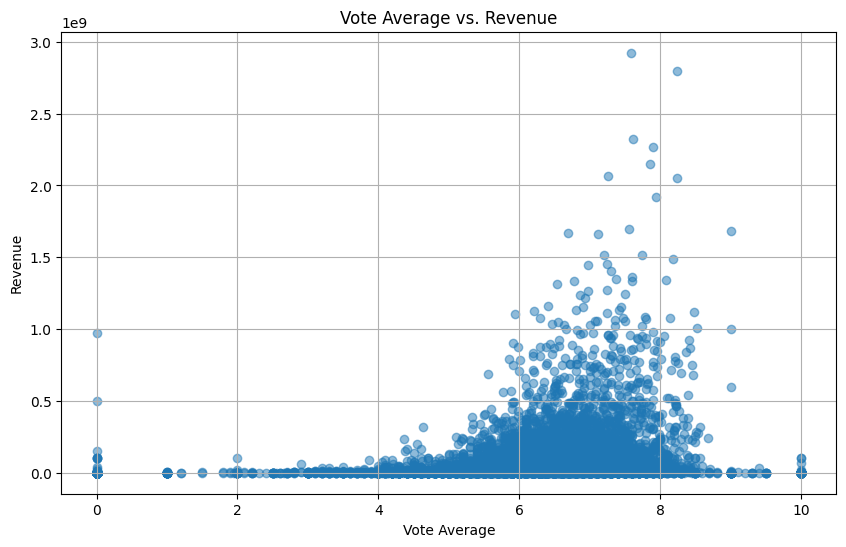

In [ ]:
# prompt: Faça um gráfico que relacione vote_average e revenue

import pandas as pd
import matplotlib.pyplot as plt

# Assuming tmdb_clean is a CSV file.  Replace 'tmdb_clean.csv'
# with the actual path or URL if different.
try:
    tmdb_clean = pd.read_csv('tmdb_clean.csv')
    print(tmdb_clean.describe())

except FileNotFoundError:
    print("Error: 'tmdb_clean.csv' not found. Please make sure the file exists and the path is correct.")

except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")

tmdb_clean['profit_percentage'] = (((tmdb_clean['revenue'] - tmdb_clean['budget']) / tmdb_clean['budget']) * 100)

plt.figure(figsize=(10, 6))
plt.scatter(tmdb_clean['vote_average'], tmdb_clean['revenue'], alpha=0.5)
plt.title('Vote Average vs. Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


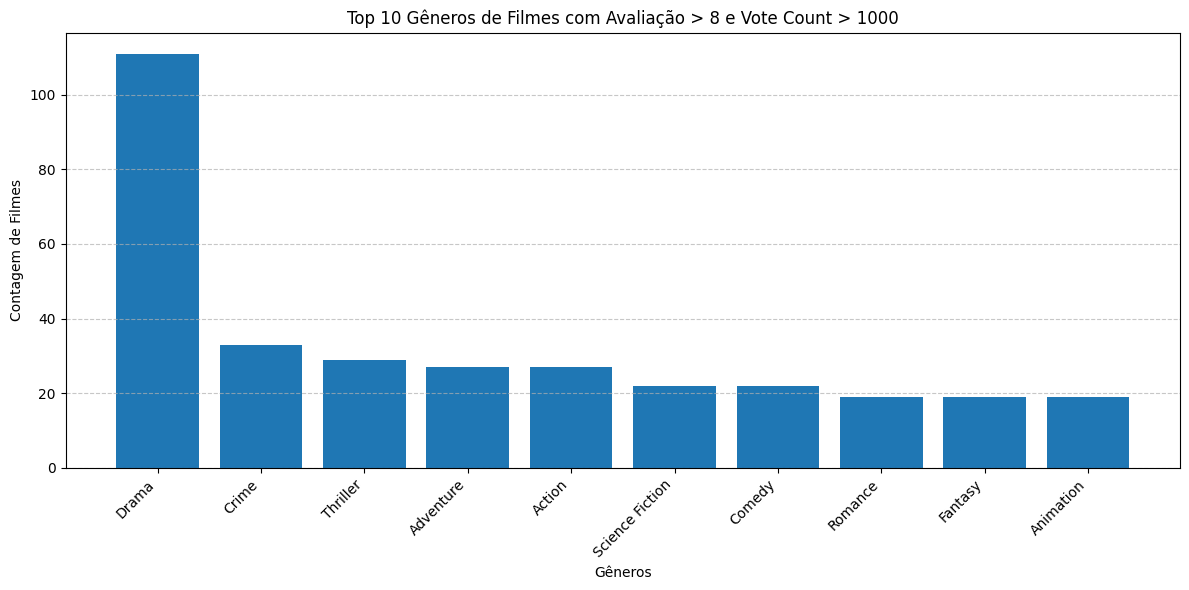

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    tmdb_clean = pd.read_csv('tmdb_clean.csv')
except FileNotFoundError:
    print("Error: 'tmdb_clean.csv' not found. Please make sure the file exists and the path is correct.")
    exit() # Exit the script if the file is not found
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    exit() # Exit the script if there's a parsing error


filtered_movies = tmdb_clean[(tmdb_clean['vote_average'] > 8) & (tmdb_clean['vote_count'] > 1000)]

def count_genres(df):
    genre_counts = {}
    for index, row in df.iterrows():
        genres = row['genres'].split(',')
        unique_genres = set([genre.strip() for genre in genres])
        for genre in unique_genres:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1
    return genre_counts


genre_counts = count_genres(filtered_movies)

# Sort and get the top 10 genres
sorted_genres = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))
top_10_genres = dict(list(sorted_genres.items())[:10])


genres = list(top_10_genres.keys())
counts = list(top_10_genres.values())

plt.figure(figsize=(12, 6))
plt.bar(genres, counts)
plt.xlabel("Gêneros")
plt.ylabel("Contagem de Filmes")
plt.title("Top 10 Gêneros de Filmes com Avaliação > 8 e Vote Count > 1000")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # <-- Adiciona grades no eixo Y com estilo tracejado
plt.tight_layout()
plt.show()


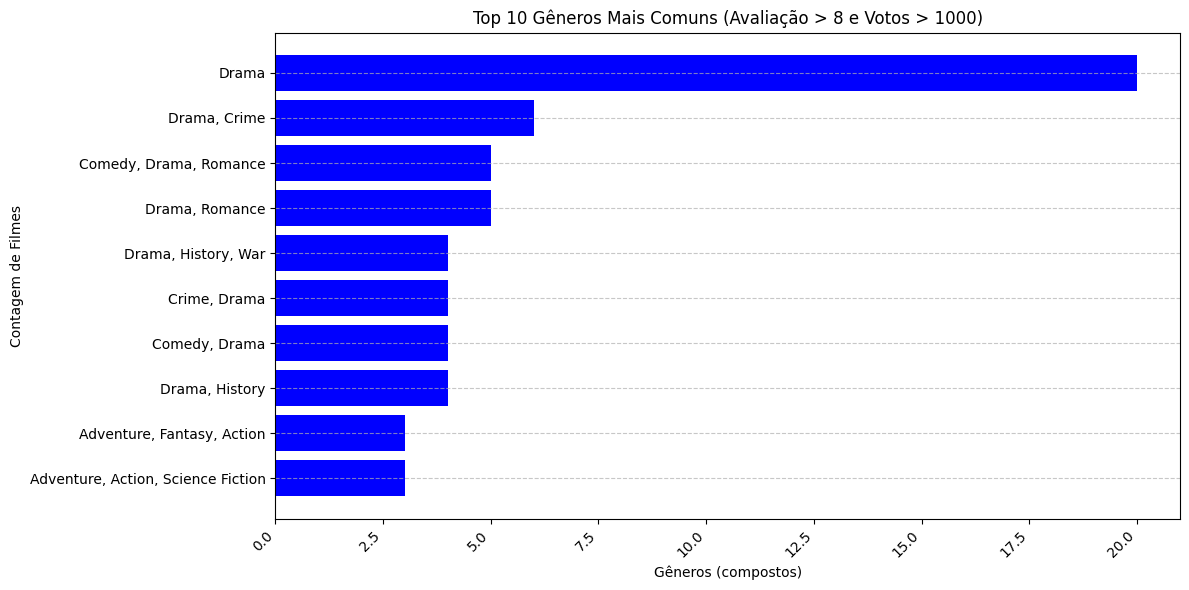

[3, 3, 4, 4, 4, 4, 5, 5, 6, 20]


In [ ]:

import matplotlib.pyplot as plt
# Filtra os filmes com avaliação > 8 e contagem de votos > 1000
filtered_movies = tmdb_clean[(tmdb_clean['vote_average'] > 8) & (tmdb_clean['vote_count'] > 1000)]

# Conta a frequência dos gêneros (mantendo os gêneros compostos)
genre_counts = filtered_movies['genres'].value_counts()

# Pega os 10 primeiros gêneros mais comuns
top_10_genres = genre_counts.head(10)

# Prepara os dados para o gráfico
genres = top_10_genres.index.tolist()
counts = top_10_genres.values.tolist()

genres = genres[::-1]
counts = counts[::-1]

plt.figure(figsize=(12, 6))
plt.barh(genres, counts, color='blue')
plt.xlabel("Gêneros (compostos)")
plt.ylabel("Contagem de Filmes")
plt.title("Top 10 Gêneros Mais Comuns (Avaliação > 8 e Votos > 1000)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(counts)

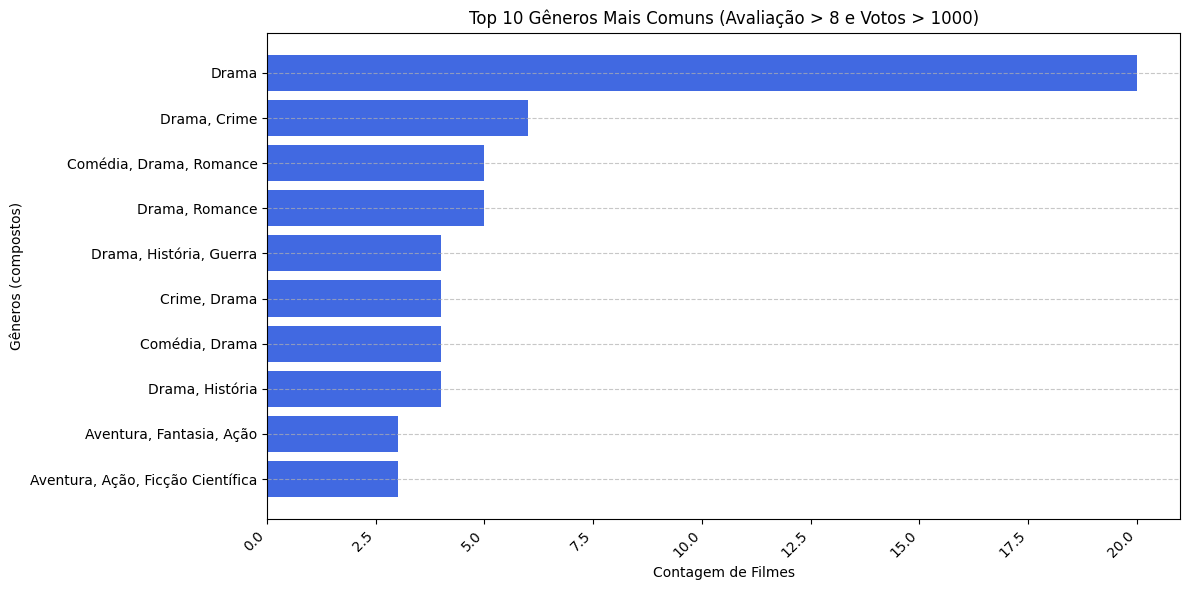

[3, 3, 4, 4, 4, 4, 5, 5, 6, 20]


In [ ]:
import matplotlib.pyplot as plt

# Função para traduzir gêneros compostos do inglês para o português
def traduzir_generos(generos):
    traducoes = {
        'Drama': 'Drama',
        'Crime': 'Crime',
        'Comedy': 'Comédia',
        'Romance': 'Romance',
        'History': 'História',
        'War': 'Guerra',
        'Adventure': 'Aventura',
        'Fantasy': 'Fantasia',
        'Action': 'Ação',
        'Science Fiction': 'Ficção Científica',
        'Thriller': 'Suspense',
        'Mystery': 'Mistério',
        'Horror': 'Terror',
        'Family': 'Família',
        'Animation': 'Animação',
        'Music': 'Música',
        'Western': 'Faroeste',
        'Documentary': 'Documentário'
    }

    generos_traduzidos = []
    for genero in generos:
        partes = genero.split(', ')
        partes_traduzidas = [traducoes.get(p.strip(), p) for p in partes]
        genero_traduzido = ', '.join(partes_traduzidas)
        generos_traduzidos.append(genero_traduzido)

    return generos_traduzidos

# Filtra os filmes com avaliação > 8 e contagem de votos > 1000
filtered_movies = tmdb_clean[(tmdb_clean['vote_average'] > 8) & (tmdb_clean['vote_count'] > 1000)]

# Conta a frequência dos gêneros (mantendo os gêneros compostos)
genre_counts = filtered_movies['genres'].value_counts()

# Pega os 10 primeiros gêneros mais comuns
top_10_genres = genre_counts.head(10)

# Prepara os dados para o gráfico
genres = top_10_genres.index.tolist()
counts = top_10_genres.values.tolist()

# Traduz os gêneros para português
genres_pt = traduzir_generos(genres)

# Inverte para o gráfico de barras horizontais
genres_pt = genres_pt[::-1]
counts = counts[::-1]

plt.figure(figsize=(12, 6))
plt.barh(genres_pt, counts, color='royalblue')
plt.xlabel("Contagem de Filmes")
plt.ylabel("Gêneros (compostos)")
plt.title("Top 10 Gêneros Mais Comuns (Avaliação > 8 e Votos > 1000)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(counts)


<ipython-input-11-c6e15056f4a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_month'] = filtered_df['release_date'].dt.month


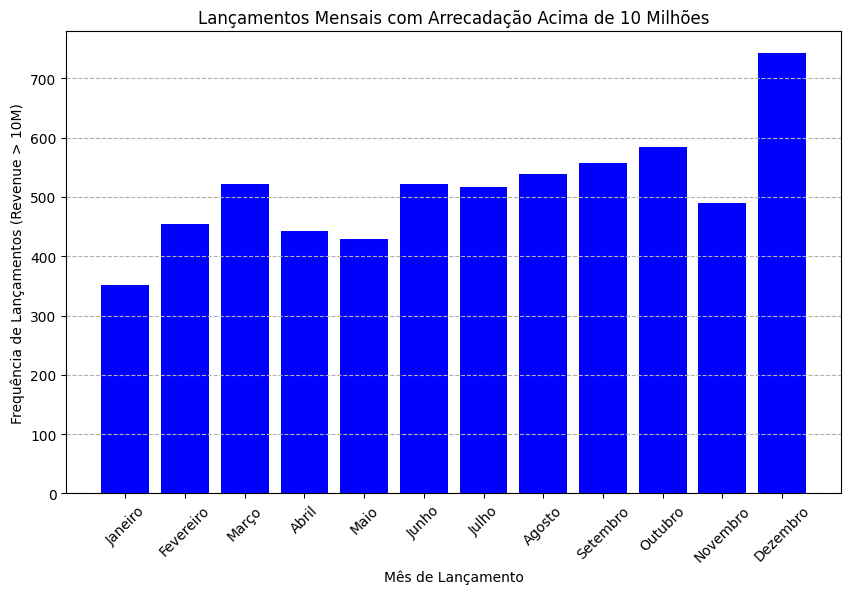

In [11]:
month_names_pt = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

tmdb_clean['release_date'] = pd.to_datetime(tmdb_clean['release_date'])

filtered_df = tmdb_clean[tmdb_clean['revenue'] > 10_000_000]

filtered_df['release_month'] = filtered_df['release_date'].dt.month

monthly_releases = filtered_df.groupby('release_month')['title'].count()

# Convertendo os números dos meses para nomes em português
month_names = [month_names_pt[month - 1] for month in monthly_releases.index]

plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_releases.values, color='blue')
plt.xlabel('Mês de Lançamento')
plt.ylabel('Frequência de Lançamentos (Revenue > 10M)')
plt.title('Lançamentos Mensais com Arrecadação Acima de 10 Milhões')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

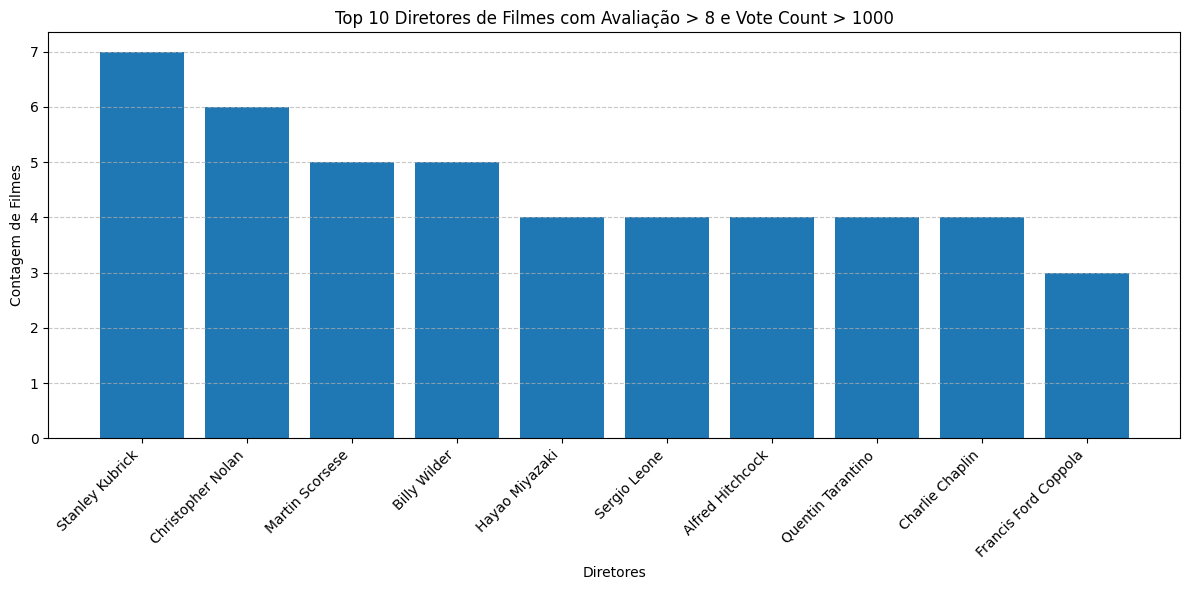

In [ ]:
# prompt: Faça a análise de frequência dos directores que participaram de filmes com vote average > 8 e vote_count > 1000

import pandas as pd
import matplotlib.pyplot as plt
# Assuming tmdb_clean is a CSV file. Replace 'tmdb_clean.csv'
# with the actual path or URL if different.
try:
    tmdb_clean = pd.read_csv('tmdb_clean.csv')
except FileNotFoundError:
    print("Error: 'tmdb_clean.csv' not found. Please make sure the file exists and the path is correct.")
    exit() # Exit the script if the file is not found
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    exit() # Exit the script if there's a parsing error

# Filter movies with vote_average > 8 and vote_count > 1000
filtered_movies = tmdb_clean[(tmdb_clean['vote_average'] > 8) & (tmdb_clean['vote_count'] > 100)]

# Function to explode the directors and count them
def count_directors(df):
    director_counts = {}
    for index, row in df.iterrows():
        directors = row['director'].split(',') # Assuming directors are comma-separated
        for director in directors:
            director = director.strip() # Remove leading/trailing spaces
            director_counts[director] = director_counts.get(director, 0) + 1
    return director_counts

director_counts = count_directors(filtered_movies)

# Sort and get the top 10 directors
sorted_directors = dict(sorted(director_counts.items(), key=lambda item: item[1], reverse=True))
top_10_directors = dict(list(sorted_directors.items())[:10])

directors = list(top_10_directors.keys())
counts = list(top_10_directors.values())

plt.figure(figsize=(12, 6))
plt.bar(directors, counts)
plt.xlabel("Diretores")
plt.ylabel("Contagem de Filmes")
plt.title("Top 10 Diretores de Filmes com Avaliação > 8 e Vote Count > 1000")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
tmdb_clean.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,production_companies,production_countries,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
0,5,Four Rooms,5.862,2688.0,1995-12-09,4257354.0,98.0,4000000.0,en,9.0011,...,"Miramax, A Band Apart",United States of America,"David Proval, Salma Hayek Pinault, Paul Calder...","Allison Anders, Alexandre Rockwell, Quentin Ta...","Phil Parmet, Andrzej Sekula, Guillermo Navarro...","Allison Anders, Alexandre Rockwell, Quentin Ta...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,114105.0
1,6,Judgment Night,6.500,349.0,1993-10-15,12136938.0,109.0,21000000.0,en,4.7523,...,"Largo Entertainment, JVC, Universal Pictures",United States of America,"Doug Wert, Hank McGill, Christine Harnos, Raic...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Gene Levy, Marilyn Vance, Lloyd Segan",Alan Silvestri,6.6,19891.0
2,11,Star Wars,8.204,21112.0,1977-05-25,775398007.0,121.0,11000000.0,en,40.6528,...,"Lucasfilm Ltd., 20th Century Fox",United States of America,"Ted Burnett, Jerry Walter, James Earl Jones, T...",George Lucas,Gilbert Taylor,George Lucas,"Rick McCallum, George Lucas, Gary Kurtz",John Williams,8.6,1505380.0
3,12,Finding Nemo,7.800,19622.0,2003-05-30,940335536.0,100.0,94000000.0,en,16.9242,...,Pixar,United States of America,"Ellen DeGeneres, Geoffrey Rush, Eric Bana, Geo...",Andrew Stanton,"Jeremy Lasky, Sharon Calahan","Adam Bronstein, Bob Peterson, Jim Capobianco, ...","Graham Walters, John Lasseter",Thomas Newman,8.2,1158587.0
4,13,Forrest Gump,8.468,28113.0,1994-06-23,677387716.0,142.0,55000000.0,en,27.4853,...,"Paramount Pictures, The Steve Tisch Company, W...",United States of America,"Margo Moorer, Joe Stefanelli, Ed Davis, Elizab...",Robert Zemeckis,Don Burgess,"Winston Groom, Eric Roth","Wendy Finerman, Steve Tisch, Steve Starkey",Alan Silvestri,8.8,2375129.0


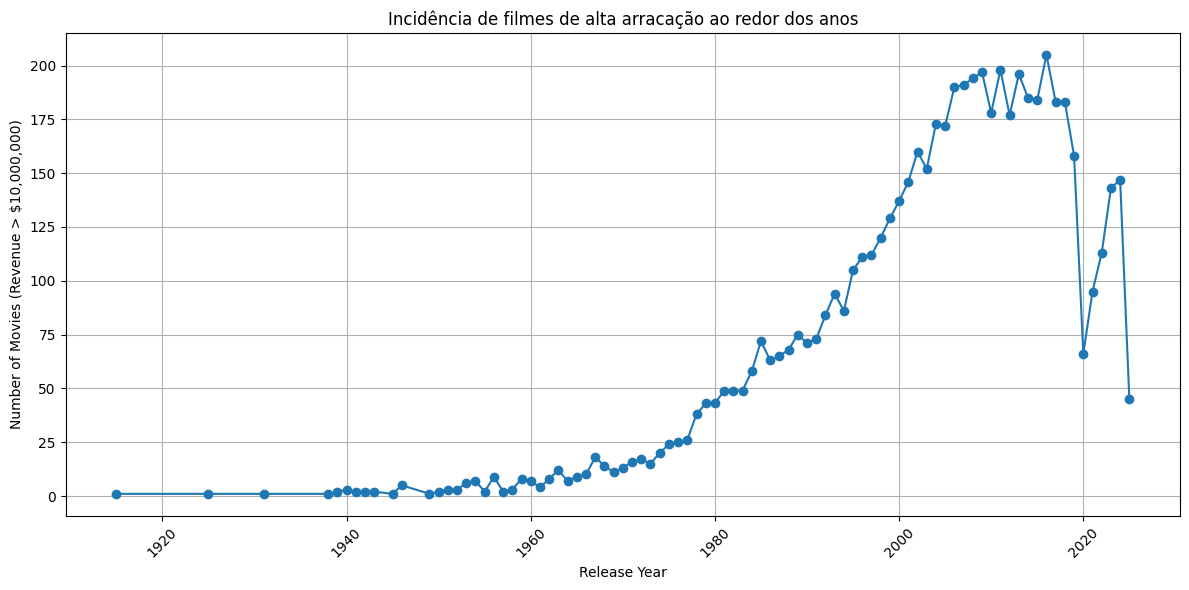

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

tmdb_clean['release_date'] = pd.to_datetime(tmdb_clean['release_date'])

high_revenue_movies = tmdb_clean[tmdb_clean['revenue'] > 10000000]

movies_by_year = high_revenue_movies.groupby(high_revenue_movies['release_date'].dt.year)['revenue'].count()

plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values, marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies (Revenue > $10,000,000)')
plt.title('Incidência de filmes de alta arracação ao redor dos anos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: Mostre o nome e gênero dos primeiros 5 registros

print(tmdb_clean[['title', 'genres']].head())


            title                              genres
0      Four Rooms                              Comedy
1  Judgment Night             Action, Crime, Thriller
2       Star Wars  Adventure, Action, Science Fiction
3    Finding Nemo                   Animation, Family
4    Forrest Gump              Comedy, Drama, Romance
